In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages

1.14.0


C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_19\Anaconda3\envs\tf_t

In [2]:
# 데이터 타입
import tensorflow as tf
hello = tf.constant("Hello, TensorFlow!")

# 텐서플로
# constant, variables, placeholder

sess = tf.Session()
print(hello) # 텐서플로의 데이터는 직접 확인이 불가
print(sess.run(hello)) # numpy 데이터로 변경하여 출력


b'Hello, TensorFlow!'
Tensor("Const:0", shape=(), dtype=string)


In [5]:
# variables
x = tf.constant(35, name='x') # 변수에 이름을 따로 또 주는 이유는???
                                # - 모델의 그래프 구조 확인을 위해
                                # - 모델을 그대로 저장(가중치)할 때 메모리 위치를 확인하기 위해
                                # 메모리에 저장된 가중치 위치를 알 수 없기 때문 운영체제가 계속 지맘대로 바꾸니까
y = tf.Variable(x + 5, name='y') # 변수가 있는 경우 : 반드시 초기화 해줘야한다.
print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [6]:
# variables 초기화 하는 법
model = tf.global_variables_initializer() # 변수 초기화

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [7]:
# 판다스에서 데이터 초기화를 리스트, 딕셔너리에 했.
a = tf.constant([1,2,3], name='a') # GPU공간에 만든다.
b = tf.constant([4,5,6], name='b')
add_op = a + b

with tf.Session() as session: # 요소끼리 계산(배열연산)
    print(session.run(add_op))

[5 7 9]


In [8]:
# 주입변수
# 자료구조가 그래프로 구성되어진다
# add, mul이 계산되어야 total이 계산될 수 있다.
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add, mul)

In [10]:
with tf.Session() as sess: # with구문 내부의 명령어가 끝나면 자동으로 세션이 종료됨.
    print("feed 변수합 : %i" % sess.run(add, feed_dict={a:2,b:3} ) )# 데이터 주입 호출
    print("feed 변수곱 : %i" % sess.run(mul, feed_dict={a:2,b:3} ) )
    print("fedd 변수곱 : %i" % sess.run(total, feed_dict={a:2, b:3} ) )

fedd 변수곱 : 30


In [11]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])
product = tf.matmul(matrix1, matrix2) # matrix multiply
# 세션 런 하기 전까진 명시적이다.

with tf.Session() as sess: # 실행부..
    result = sess.run(product)
    print(result)

[[12.]]


In [12]:
zeros = tf.zeros([2,2]) # 0
ones = tf.ones([6])     # 1

#균등분포
uniform = tf.random_uniform([3,3,3], minval=0.0, maxval=10) 
# 정규분포
normal = tf.random_normal([3,3,3], mean=0.0, stddev=2.0)
# truncated normal : 표준편차 2배수 내의 것으로 초기화
trunc = tf.truncated_normal([2,2], mean=5.0, stddev=1.0)
random_var = tf.Variable( tf.truncated_normal([2,2]) )

In [18]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(trunc))
print("변수초기화\n", sess.run(random_var))

[[3.5017588 3.7734756]
 [5.556643  5.9936023]]
변수초기화
 [[ 0.18507695 -0.04429251]
 [-0.3965657  -0.64081055]]


In [20]:
import tensorflow as tf
my_tensor = tf.constant(0, shape=[6,2]) # 6x2행렬
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape))
print(my_static_shape)
# 내용은 run으로, 차수는 get_shape 함수로 확인

# 전치해보자
my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


In [21]:
# 대화형 세션 : 
import tensorflow as tf
tf.InteractiveSession() # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval()) # 대화형 세션인 경우 run하지 않아도 볼수

[0. 0.]


In [23]:

def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() # chaining
    print(t.eval())
    sess.close()

In [24]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.Variable([2.3, 4.5]), tf.Variable([-2, 3, 5])
showvalue(tf.add_n([c2, v2]))
showvalue(tf.add_n([c3, v3, v3])) # add_n ?: 여러개의 합이 가능 

[ 3.5 10.1]
[-8  5 17]


C:\Users\ICT01_19\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# 2x +  y +  z  = 1
# 4x + 3y + 4z  = 2
# -4x+ 2y + 2z  = -6

#  A dot x = [1 , 2, -6 ]
#        y
#        z

# 3x3  3x1  =>  3x1

# x   구하려면?   A의 역행렬을 곱해야
# y
# z

In [25]:
sess=tf.Session()
x = tf.constant([2.0, 1.0, 1.0,
                 4, 3, 4,
                 -4, 2, 2], shape=[3, 3])
print(sess.run(x))

y = tf.constant([1.0, 2, -6], shape=[3, 1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [27]:
z = tf.matrix_solve(x,y) # param1의 역행렬과 param2를 곱한 값; 다차방정식의 해
result = sess.run(z)
print("계수 : ", result,"\n")
print(sess.run(z))

계수 :  [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]] 

[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


In [29]:
print(2.0*result[0] + 1.0*result[1] + 1.0*result[2])
print(sess.run(tf.matmul(x, z)))

[1.0000001]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [31]:
x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1, y)
print("해\n", sess.run(z))

해
 [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [35]:
# 특이행렬분해 (singular value decomposition) : 행렬이 다를 때 활용

# PCA 할 때 : 고유값 분해 eigen value + eigen vector : 정방행렬인 경우에만 고유값 분해 가능.
# 근데 하기 는 정방행렬이 아님
# 정방행렬이 아닌 경우에는 특이행렬분해로
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
a = tf.to_float(a)
u, s, v = tf.svd(a)
# 행과 열의 특징을 별도로 뽑음

print(sess.run(u),"\n") # left singular value 1x2
print(sess.run(s),"\n") # singular value 2x2
print(sess.run(v),"\n") # right singular value 3x2

[9.508034   0.77286935] 

[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]] 

[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]] 



In [36]:
# 대각행렬
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬은 one hot encoding할때 많이 사용됨
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [37]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia))) # 대각선 요소를 다 더해줌

[1 2 3 4]
10


In [40]:
import numpy as np
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
b = tf.constant([7,8,9,10,11,12], shape=[3,2])
c = tf.matmul(a, b)
sess.run(c)

array([[ 58,  64],
       [139, 154]])

In [41]:
# 행렬 : 맨 뒤의 행과 열을 확인하고
# 앞의 개수는 어떻게 층을 이루고 있는지에 대한 것

a = tf.constant(np.arange(1,13,dtype=np.int32), shape=[2,2,3]) # 행렬을 중심으로 데이터 표현
print(sess.run(a))

b= tf.constant(np.arange(13,25,dtype=np.int32), shape=[2,3,2])
print(sess.run(b))

c = tf.matmul(a,b)
sess.run(c)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [42]:
# 행렬 : 맨 뒤의 행과 열을 확인하고
# 앞의 개수는 어떻게 층을 이루고 있는지에 대한 것

a = tf.constant(np.arange(1,25,dtype=np.int32), shape=[2, 2,2,3]) # 행렬을 중심으로 데이터 표현
print(sess.run(a))

b= tf.constant(np.arange(25,49,dtype=np.int32), shape=[2, 2,3,2])
print(sess.run(b))

c = tf.matmul(a,b)
sess.run(c)

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [44]:
# a를 제곱한다면? 자기자신을 제곱하려면 전치해야
# 다차행렬의 전치도 맨 뒤의 행렬만 신경써주면 됨. 맨뒤에 행렮만 전환하면 됨

d = tf.matmul(a, tf.transpose(a, perm=[0,1,3,2]))
print(sess.run(d))
tf.matmul(a,a,transpose_b=True)#전치해서 자기 제곱

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


<tf.Tensor 'MatMul_9:0' shape=(2, 2, 2, 2) dtype=int32>

In [47]:

                            # 0   1   2
x = tf.constant([[[1, 2, 3],# 2 x 2 x 3    =>  제곱이 되려면 2x3x2 (0, 2, 1)
                 [4, 5, 6]],
                [[7, 8, 9],
                 [10, 11, 12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) # 3 x 2 x 2    # 디폴트 2 1 0

# 그래서
y = tf.transpose(x, perm=[0,2,1])
sess.run(tf.transpose(y))

[2 2 3]


array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [48]:
sess.run(tf.matmul(x, tf.transpose(x, perm=[0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [51]:
# 주어진 리스트로 6차원행렬을 만들어보자
t = [1,2,3,4,5,6]

t = tf.reshape(t, [1,2,1,3,1,1])
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [52]:
print("t의 차원은 ", sess.run(tf.shape(t)))

t의 차원은  [1 2 1 3 1 1]


In [53]:
print("차원의 수를 축소할 때 ", sess.run(tf.shape(tf.squeeze(t))))
# squeeze : 요소가 하나로 이루어진 차원을 다 없애

차원의 수를 축소할 때  [2 3]


In [54]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]

# -1 : 계산해서 채워라
print( sess.run( tf.reshape( tensor, [2,-1]) ) )
tf.reshape(tensor, [-1, 6])
print( sess.run( tf.reshape( tensor, [2, -1, 3]) ) )

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [55]:
# 차원 확대
print( tf.expand_dims(t, 0) )

# 차원 확대 축소 하는 이유 : 행렬곱연산때문

Tensor("ExpandDims:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [56]:
# 패딩
t = [[1,2,3], [4,5,6]] # 2x3 => 4x7
paddings = [[1,1], [2,2]] # 상 하 좌 우
print(sess.run(tf.pad(t, paddings , "CONSTANT")))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [58]:
paddings = [[1,1], [1,1]] # 4x5
print(sess.run(tf.pad(t, paddings, "REFLECT") ))

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [59]:
print(sess.run(tf.pad(t, paddings, "SYMMETRIC")))

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


In [ ]:
# 다차 방정식의 해 구하는 법
- 무작위 대입법
- 역행렬을 구함

- 입출력데이터만 있 : 계수를 결정해야(가중치 학습을 통해서 학습시켜)

In [77]:
# 데이터로부터 규칙을 찾 -> 예측과 분류를 하기 위해


import numpy as np
import tensorflow as tf

# 데이터 생성  => minibatch로 만들어 feeding 해줘야. feeding은 반복문으로

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3 # 이거 없다고 생각하고 봐
len(y_data)

100

In [89]:
# 가중치와 바이어스로 수식 만들기
# 가중치 : 설명력
# 바이어스는 activation(활성계수)
# 가중치에는 반드시 바이어스가 하나씩 결합

# W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 균등분포로 초기화
# b = tf.Variable(tf.zeros([1])) # 바이어스
# sess = tf.Session()
# y = W * x_data + b # 예측

##################################
# 데이터 바로 쓰지말고, 주입변수로 써보자
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 균등분포로 초기화
b = tf.Variable(tf.zeros([1])) # 바이어스
sess = tf.Session()

y_model = W * x + b
###############################

In [90]:
# loss function : mse : 2차원인 경우 포물선을 이루고 최적점은 한개
# (예측치 - 실제값)^2  하나의 값으로 만들어 평균
# loss = tf.reduce_mean(tf.square(y - y_data))
loss = tf.reduce_mean(tf.square(y_model - y))


# 경사하강법
# 기울기 : 미분을 이용해서 -면 가중치에 차를더해주고
#                           +면 가중치에 감산해주고
optimizer = tf.train.GradientDescentOptimizer(0.5) # 학습율
train = optimizer.minimize(loss) # 

In [91]:
init = tf.global_variables_initializer() # 세션 run하기 전에만 초기화하면 됨.
sess.run(init)

In [92]:
# for step in range(201):
#     sess.run(train)
#     if step % 20 == 0:
#         print(step, sess.run(W), sess.run(b)) # 0.1과 0.3으로 수렴

        
for step in range(201):
    sess.run(train, {x : x_data, y : y_data} )
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b)) # 0.1과 0.3으로 수렴


# data
# predict
# loss func
# optimizer 순으로..

0 [0.655727] [0.00622187]
20 [0.22511928] [0.23479721]
40 [0.12808354] [0.285365]
60 [0.10630346] [0.2967151]
80 [0.10141484] [0.2992627]
100 [0.10031758] [0.29983452]
120 [0.1000713] [0.29996285]
140 [0.10001601] [0.29999167]
160 [0.10000359] [0.29999813]
180 [0.10000082] [0.2999996]
200 [0.10000017] [0.29999992]


In [93]:
predicted = sess.run( y_model, {x:[i for i in range(100)]})

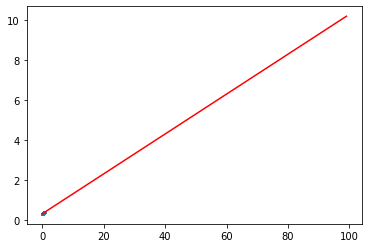

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', markersize=2)
plt.plot(predicted, 'r')
plt.show()

In [95]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [96]:
sess = tf.Session()
x_vals = np.array([1., 3., 5., 7., 9.])
y_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data, y_data)
for x_val in x_vals :
    print(sess.run(prod, feed_dict={x_data : x_val,
                                   y_data : y_vals}))

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [97]:
merged = tf.summary.merge_all()
if not os.path.exists('C://tmp/tensorboard_logs/'):
    os.makedirs('C://tmp/tensorboard_logs/')

my_writer = tf.summary.FileWriter('C://tmp/tensorboard_logs/', sess.graph)

In [99]:
# 문제 ?
import numpy
rng = numpy.random
# 상수화하면 좋은 점?
learning_rate = 0.01
training_epochs = 4000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [100]:
# data point : 관측치
# 0 행, 샘플수 결정   |   1 변수개수 결정
n_samples = train_X.shape[0] # 차수 : 0 <- 행  인덱스 접근 샘플 수 몇개인지 결정
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight")# 설명
b = tf.Variable(rng.randn(), name="bias")# activation 활성화
activation = tf.add(tf.multiply(X, W), b) # y = ax + b를 이렇게도 쓸 수 있다.

# minibatch 사이즈를 고려했기때문에 2를 나눠준거임
cost = tf.reduce_sum(tf.pow(activation-Y, 2)) / (2*n_samples) # activation 예측치 | Y 실제값
# 역전파 : optimizer도 hyper parameter
optimizer = tf.train.GradientDescentOptimizer( # momentum : 고려
    learning_rate).minimize(cost) # hyper parameter 
init = tf.initialize_all_variables()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 16.523485184 W= -0.17431821 b= -2.1958144
Epoch: 0051 cost= 0.530952632 W= 0.62609637 b= -1.9070678
Epoch: 0101 cost= 0.478528798 W= 0.6037042 b= -1.7459794
Epoch: 0151 cost= 0.432156503 W= 0.5826434 b= -1.5944698
Epoch: 0201 cost= 0.391138405 W= 0.56283534 b= -1.4519726
Epoch: 0251 cost= 0.354855925 W= 0.5442056 b= -1.3179507
Epoch: 0301 cost= 0.322761804 W= 0.5266833 b= -1.1918968
Epoch: 0351 cost= 0.294374049 W= 0.51020354 b= -1.0733436
Epoch: 0401 cost= 0.269263625 W= 0.49470386 b= -0.9618399
Epoch: 0451 cost= 0.247052476 W= 0.480126 b= -0.8569672
Epoch: 0501 cost= 0.227405921 W= 0.46641505 b= -0.758332
Epoch: 0551 cost= 0.210028246 W= 0.45351985 b= -0.6655642
Epoch: 0601 cost= 0.194657087 W= 0.44139144 b= -0.57831323
Epoch: 0651 cost= 0.181061074 W= 0.42998436 b= -0.49625185
Epoch: 0701 cost= 0.169035062 W= 0.41925573 b= -0.41907057
Epoch: 0751 cost= 0.158397838 W= 0.40916508 b= -0.34647942
Epoch: 0801 cost= 0.148989096 W= 0.39967453 b= -0.27820525
Epoch: 0851 co

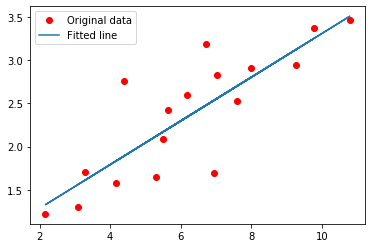

In [101]:
# 그래프 정의
#  node : 연산  |  edge(데이터 전달 : tensor(배열+행렬))
# 전제조건 : GPU가 존재한다 전제가 있어야. -> 네트웤으로 연결 

with tf.Session() as sess: # 실행부
    sess.run(init)
    for epoch in range(training_epochs): # 세대[반복]
        for (x, y) in zip(train_X, train_Y): #데이터를 1개씩 feeding
            sess.run(optimizer, feed_dict={X:x, Y:y})
        if epoch % display_step == 0: # 비용함수는 감소해야.. 우하향 # accurency는 증가해야 # acurrency는 미분하면 0으로 가능 경우가 많아서 비용함수로..
            print("Epoch:","%04d"%(epoch+1), "cost=", "{:.9f}".format(sess.run(cost, feed_dict={X : train_X, Y:train_Y})),
            "W=", sess.run(W), "b=",sess.run(b)) # 수렴값

    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}),
         "W=",sess.run(W), "b=", sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    # predict한 결과값 출력
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b),
            label='Fitted line')
    plt.legend()
    plt.show()

In [104]:
# 
W = 0.24768482
b = 0.80373293

In [105]:
# 텐서는 직접 데이터를 불러올 수 없다.
# 직접 시각화하는 것도 불가능 -> numpy포맷으로 변경해야

import tensorflow as tf
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [108]:
my_distribution = tf.random_uniform((600,400), seed=42)
uniform = run_variable(my_distribution)

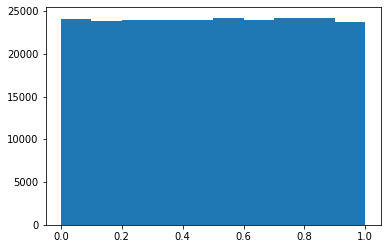

In [109]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) # flatten : 차수는 무시하고 1차원으로.. 데이터 메모리 저장 : 1차원으로 저장..
plt.show()

# 데이터 갯수가 적으면 균등분포가 되지않는다.

In [ ]:
# activation 함수의 역할? : 회귀인가 분류인가를 결정
#  - 비선형 매핑(선형대수문제를 비선형문제으로 변경)
#  - 그래서 가중치를 깊게하고, 활성화함수매핑으로 xor문제를 해결 

# 신경망은 한번쓴 변수는 다시쓸수없다. 리셋해줘야한다. 리셋하지 않으면 문제 발생.

In [124]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

ops.reset_default_graph() #그래프 초기화
sess = tf.Session()

x_vals = np.linspace(start = -10., stop = 10., num=100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[ 0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[0.31326166 0.6931472  1.3132616 ]
[[2.15844873]
 [2.10633425]
 [2.17953243]
 [2.12058811]
 [2.14336902]
 [2.26359209]
 [2.09247276]
 [2.18088182]
 [2.18121859]
 [2.11018215]
 [2.02078077]
 [2.10063882]
 [2.12058811]
 [2.2001378 ]
 [2.13547631]
 [2.05542838]
 [2.15439329]
 [1.99436182]
 [2.03014318]
 [2.07775452]
 [2.12738989]
 [2.09752448]
 [2.20273611]
 [2.18121859]
 [2.18210158]
 [2.15882757]
 [2.091674  ]
 [2.06419779]
 [2.19039433]
 [2.03014318]
 [2.20657976]
 [2.02198596]
 [2.26728237]
 [2.01158844]
 [2.19546643]
 [2.08041621]
 [2.1280733 ]
 [2.22031417]
 [2.16875823]
 [2.15844873]
 [2.03229674]
 [2.25710842]
 [2.11684628]
 [2.07721946]
 [2.14219741]
 [2.01804453]
 [2.16954475]
 [2.08521482]
 [2.17281164]
 [2.05443261]]
[[2.03571126]
 [1.9765863 ]
 [2.0595157 ]
 [1.99279899]
 [2.01864543]
 [2.15380366]
 [1.96078918]
 [2.06103703]
 [2.06141667]
 [1.98096613]
 [

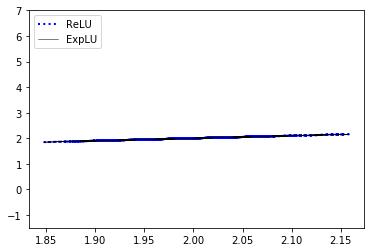

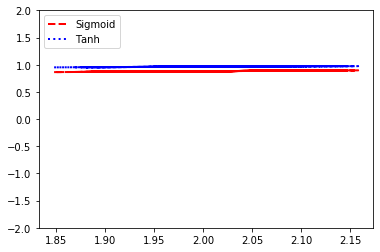

In [141]:
# relu가 가장많이 쓰임. elu는 relu를 조금 수정한것
print( sess.run( tf.nn.relu([-3., 3., 10.]) )) # 0~∞
y_relu = sess.run(tf.nn.relu(x_vals))

print(sess.run(tf.nn.sigmoid([-1., 0., 1.]))) #0~1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

print(sess.run(tf.nn.tanh([-1., 0., 1.])))# -1~1
y_tanh = sess.run(tf.nn.tanh(x_vals))

print(sess.run(tf.nn.elu([-1., 0., 1.])))# -1~∞
y_elu = sess.run(tf.nn.elu(x_vals))

print(sess.run(tf.nn.softplus([-1., 0., 1.]))) # 엘루의 각진 단점을 보완한 것이 소프트 플러스
y_softplus = sess.run(tf.nn.softplus(x_vals))
print(y_softplus)
print(y_elu)

plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend(loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid, 'r--', label="Sigmoid", linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label="Tanh", linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

In [140]:
import tensorflow as tf

ops.reset_default_graph() # 그래프 초기화
sess=tf.Session()
tf.set_random_seed(5) # 시드 초기값
np.random.seed(42)
batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1])) # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # bias
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))

x = np.random.normal(2, 0.1, 500) # 500개의 데이터를 랜덤으로 생성

# None
# 사이즈 fix하지 않고 입력 데이터로부터 계산
# 행 데이터로 생성
# ex) [2,3,2,12,2,1,23,21,3]
x_data = tf.placeholder(shape = [None, 1], dtype=tf.float32)

In [134]:
# y = ax + b 꼴을 취해 주되 sigmoid를 달아줘서 값을 0 ~ 1 사이값으로 매핑
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
# relu를 달아줘서 값을 0 ~ ∞ 값으로 매핑
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

# 0.75로 수렴과정
# MSE 식
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.01)# 학습률 0.01로 주고
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print("\n sigmoid and Relu 함수의 최적화 0.75")


 sigmoid and Relu 함수의 최적화 0.75


In [135]:
loss_vec_sigmoid = [] #로스값을 저장하기 위한 공간
loss_vec_relu = []

In [138]:
for i in range(500):
    # 500개 중 50개 초이스
    rand_indices = np.random.choice(len(x), size=batch_size) # batch_size = 50
    x_vals = np.transpose([x[rand_indices]]) # 모양맞추기 위해 조정
    
    sess.run(train_step_sigmoid, feed_dict={x_data : x_vals})
    sess.run(train_step_relu, feed_dict={x_data : x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data : x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data : x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data : x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data : x_vals}))
    
    if i % 50 == 0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + ' relu' + str(np.mean(relu_output)))
        
# 0.75 수렴하는 과정

sigmoid = 0.12870753 relu1.8938602
sigmoid = 0.17667443 relu0.75795364
sigmoid = 0.25224036 relu0.7486777
sigmoid = 0.35073912 relu0.7475851
sigmoid = 0.44995007 relu0.7466505
sigmoid = 0.5288399 relu0.75078493
sigmoid = 0.5881987 relu0.7462536
sigmoid = 0.62726855 relu0.7498423
sigmoid = 0.6581211 relu0.74611145
sigmoid = 0.6792232 relu0.7435567


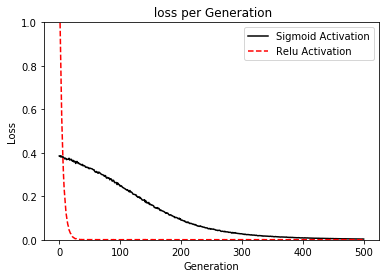

In [139]:
# 비용함수 값 그래프
# 렐루는 속도도 빠르고 빨리 근사치로 간다.
# 그래서 지금은 시그모이드 잘 안씀
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 